# 2. Model Building and Evaluation

### 0. Imports

In [ ]:
import numpy as np
import pandas as pd
import os
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import cv2 as cv
from utils import *
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import xgboost

### 1. Load in Processed Images

In [9]:
cwd = os.getcwd()
data_path = os.path.join(cwd,'data/Training')

X = []
y = []

for label in os.listdir(data_path):
    for image in os.listdir(os.path.join(data_path,label)):
        image_path = os.path.join(data_path,label,image)
        load_image = preprocess_image(image_path)
        flatten_image = load_image.flatten()
        X.append(flatten_image)
        y.append(label)


# Convert to Numpy Array
X = np.array(X)
y = np.array(y)
le = LabelEncoder()
le.fit(y) 
y = le.transform(y)

print(X.shape)
print(y.shape)

print(X[0])
print(y[0])

(5712, 262144)
(5712,)
[0. 0. 0. ... 0. 0. 0.]
3


### 2. Base Model (most common class classifier)

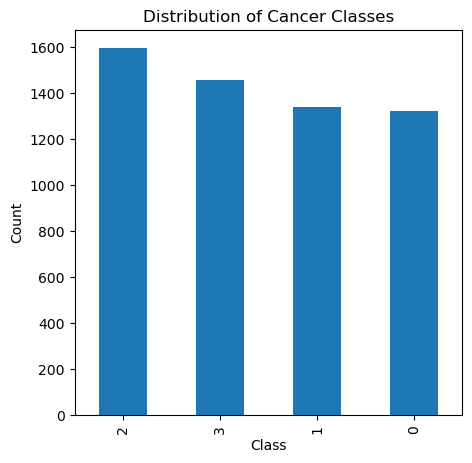

['glioma' 'meningioma' 'notumor' 'pituitary']


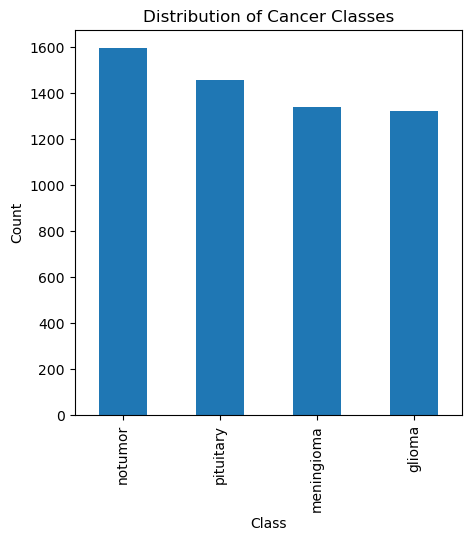

Most Common Label: 2
(5712,)
(5712,)


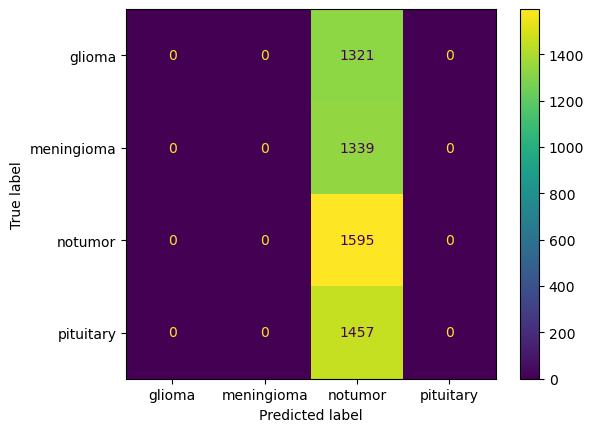

================== TRAINING METRICS ===================
Accuracy Score: 0.27923669467787116
Macro Precision: 0.06980917366946779
Macro Recall: 0.25
Macro F1: 0.10914191870808813
Micro Precision: 0.27923669467787116
Micro Recall: 0.27923669467787116
Micro F1: 0.27923669467787116


/Users/richardyan/miniforge3/envs/datasci281/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [10]:
plt.figure(figsize=(5,5))
y_train_series = pd.Series(y)
y_train_series.value_counts().plot(kind='bar')
plt.title('Distribution of Cancer Classes')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()
print(le.classes_)
y_transformed = le.inverse_transform(y)

plt.figure(figsize=(5,5))
y_train_series = pd.Series(y_transformed)
y_train_series.value_counts().plot(kind='bar')
plt.title('Distribution of Cancer Classes')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()


# Generate Model Statistics
most_common_label = stats.mode(y)[0]
print("Most Common Label: " + str(most_common_label))
y_predict = np.ones((y.shape)) * most_common_label
print(y_predict.shape)
print(y.shape)

# Generate Confusion Matrix
confusion_matrix = metrics.confusion_matrix(y, y_predict)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = le.classes_)
cm_display.plot()
plt.show()

accuracy_score = metrics.accuracy_score(y, y_predict)
macro_precision = metrics.precision_score(y,y_predict,average ='macro')
macro_recall = metrics.recall_score(y,y_predict,average='macro')
macro_f1 = metrics.f1_score(y,y_predict,average='macro')
micro_precision = metrics.precision_score(y,y_predict,average='micro')
micro_recall = metrics.recall_score(y,y_predict,average='micro')
micro_f1 = metrics.f1_score(y,y_predict,average='micro')

print("================== TRAINING METRICS ===================")
print("Accuracy Score: " + str(accuracy_score))
print("Macro Precision: " + str(macro_precision))
print("Macro Recall: " + str(macro_recall))
print("Macro F1: " + str(macro_f1))
print("Micro Precision: " + str(micro_precision))
print("Micro Recall: " + str(micro_recall))
print("Micro F1: " + str(micro_f1))

### 3. Extract Features (Canny Edges, Difference of Gaussians, Complex Feature)

In [11]:
### TBD

### 4. Shuffle Data

In [12]:
np.random.seed(281)

# Create a list of indexes that is the length of the number of training examples
indices = [i for i in range(0,X.shape[0])]
shuffle_indices = np.random.permutation(indices)

# Reorder X and Y based on the shuffled indices
X = X[shuffle_indices]
y = y[shuffle_indices]

### 5. Logistic Regression Model

In [13]:
logistic_model = LogisticRegression(multi_class='multinomial',solver='lbfgs',max_iter=100)
logistic_model.fit(X,y)
y_logistic_pred = logistic_model.predict(X)

/Users/richardyan/miniforge3/envs/datasci281/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/Users/richardyan/miniforge3/envs/datasci281/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


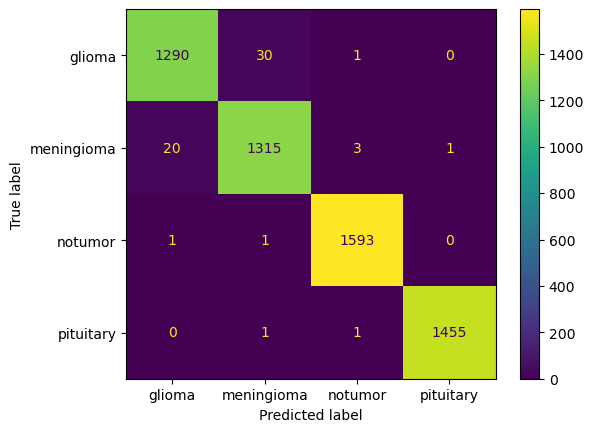

================== TRAINING METRICS ===================
Accuracy Score: 0.989670868347339
Macro Precision: 0.989102368280314
Macro Recall: 0.9889956259394984
Macro F1: 0.989043038365658
Micro Precision: 0.989670868347339
Micro Recall: 0.989670868347339
Micro F1: 0.989670868347339


In [14]:
# Generate Confusion Matrix for Logistic Regression
confusion_matrix = metrics.confusion_matrix(y, y_logistic_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = le.classes_)
cm_display.plot()
plt.show()

accuracy_score = metrics.accuracy_score(y, y_logistic_pred)
macro_precision = metrics.precision_score(y,y_logistic_pred,average ='macro')
macro_recall = metrics.recall_score(y,y_logistic_pred,average='macro')
macro_f1 = metrics.f1_score(y,y_logistic_pred,average='macro')
micro_precision = metrics.precision_score(y,y_logistic_pred,average='micro')
micro_recall = metrics.recall_score(y,y_logistic_pred,average='micro')
micro_f1 = metrics.f1_score(y,y_logistic_pred,average='micro')

print("================== TRAINING METRICS ===================")
print("Accuracy Score: " + str(accuracy_score))
print("Macro Precision: " + str(macro_precision))
print("Macro Recall: " + str(macro_recall))
print("Macro F1: " + str(macro_f1))
print("Micro Precision: " + str(micro_precision))
print("Micro Recall: " + str(micro_recall))
print("Micro F1: " + str(micro_f1))

### 4. Build Support Vector Machine (this takes > 1 hour to run, will leave commented out for now)

In [15]:
# svm_param_grid = {
#     'C': [0.1,1,10,100],
#     'gamma': [0.0001,0.001,0.1,1],
#     'kernel': ['rbf','poly']
# }

# svc = svm.SVC(probability=True)
# model = GridSearchCV(svc, svm_param_grid, scoring='accuracy', cv=5)
# model.fit(X,y)

# print(model.best_params_)
# print(model.score(X,y))

### 5. Build Gradient Boosted Machine (training also takes > 1 hour)

In [16]:
# gbm_param_grid = {'loss':['log_loss'],
#                 'learning_rate':[0.1],
#                 'n_estimators':[80,100,120],
#                 'max_depth':[2,3,4]}

# gbm = GradientBoostingClassifier()
# gbm_model = GridSearchCV(gbm, gbm_param_grid, scoring='accuracy',cv=5)
# gbm_model.fit(X,y)
# print(str(gbm_model.best_params_))
# print(str(gbm_model.score(X,y)))

### 6. XGBoost Approach